# Preliminary

## Libraries

In [1]:
# Data Manipulation
from collections import Counter
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Load Judas Libraries
from judas.regression.automate import Judas as JudasRegressor
from judas.classification.automate import Judas as JudasClassifier
from judas.automate import General

# Import Dependencies
%matplotlib inline

C:\Users\Rad\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# Preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
# Load General Functions
gen = General()

## Functions

In [5]:
class DataFrameImputer(TransformerMixin):
    strategy = 'mean'

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """

    def fit(self, X, y=None):
        """Imputed value will be based on strategy mean. median, mode 
        or most_frequent.
        """
        if self.strategy == 'mean':
            self.fill = pd.Series([X[c].value_counts().index[0]
                                   if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
                                  index=X.columns)
        elif self.strategy == 'median':
            self.fill = pd.Series([X[c].value_counts().index[0]
                                   if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
                                  index=X.columns)
        elif self.strategy == 'mode':
            self.fill = pd.Series([X[c].value_counts().index[0]
                                   if X[c].dtype == np.dtype('O') else X[c].mode() for c in X],
                                  index=X.columns)
        elif self.strategy == 'most_frequent':
            self.fill = pd.Series([X[c].value_counts().index[0]
                                   if X[c].dtype == np.dtype('O') else X[c].value_counts().index[0] for c in X],
                                  index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

# Data Loading and Preparation

## Load Data

In [6]:
# file = "bank_dirty_500.xlsx"

# Excel
# df_data = pd.read_excel(file, sheet_name='Sheet1')
# df_data.head()

# # CSV
# df_data = pd.read_csv(file)
# df_data.head()

# # JSON
# df_data = pd.read_json(file)
# df_data.head()

# # SNS
df_data = sns.load_dataset('titanic')
df_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df_data.shape

(891, 15)

In [8]:
df_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## EDA

### Data Description

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### Histogram

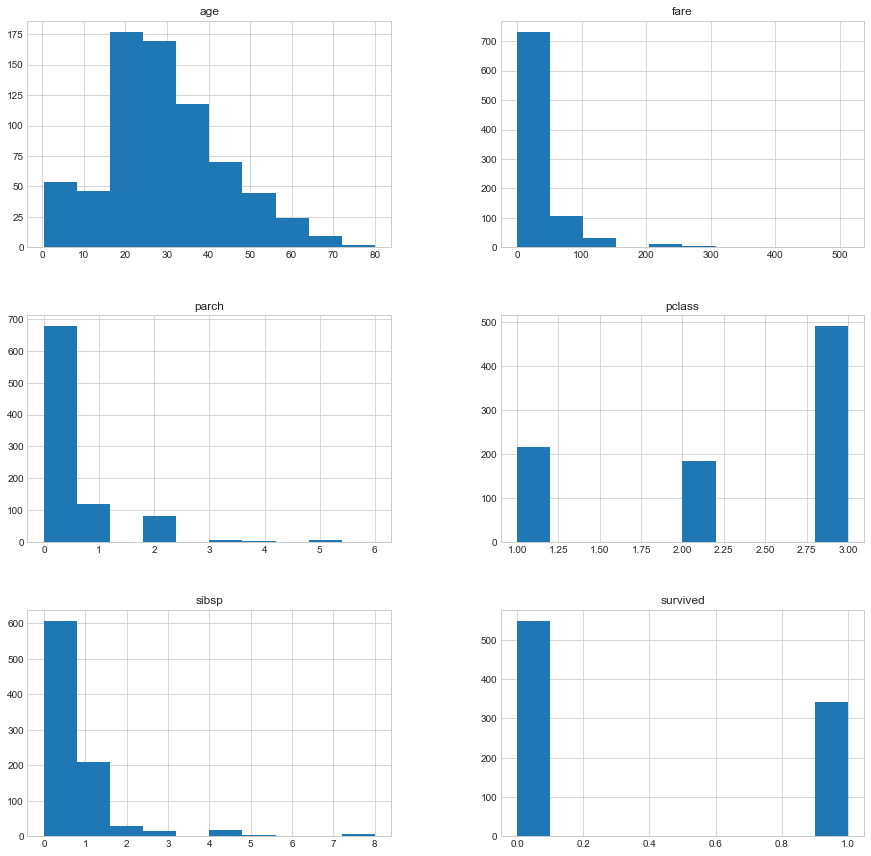

In [10]:
# remove boolean as it produces error in hist
df_data[df_data.columns.difference(['adult_male','alone'])].hist(figsize=(15,15));

In [11]:
df_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# replace data labeled as unknown to NaN
# df_data = df_data.apply(lambda s: s.replace("unknown",np.NaN))

In [14]:
#if need to drop columns manually first
to_drop = ['embark_town', 'alive']
df_clean = df_data.drop(to_drop, axis=1)

## Cleaning and Handling Missing Values

### Eliminate samples or features with missing values 

In [15]:
df_clean = df_clean.dropna(axis=0)
# df_data.dropna(axis=0,inplace=True)
# df_data.dropna(axis=1)
# df_data.dropna(how='all')
# df_data.dropna(thresh=4)
# df_data.dropna(subset=['C'])

### Imputing missing values

In [16]:
# X = pd.DataFrame(df_data)
# DataFrameImputer.strategy = 'mean'
# df_dataX = DataFrameImputer().fit_transform(X)

In [17]:
# df_dataX.info()

### Mapping ordinal features

In [18]:
# size_mapping = {
# 'XL': 2,
# 'L': 1,
# 'M': 0}
# df_data['size'] = df_data['size'].map(size_mapping)

### Encoding class labels

In [19]:
# X = df_data[['color', 'size', 'price']].values
# df_le = LabelEncoder()
# X[:, 0] = df_le.fit_transform(X[:, 0])
# X

### Transforming some columns

In [20]:
df_transformed = df_clean.copy()
log_features = ['fare']
for feature in log_features:
    df_transformed[feature] = np.log(df_transformed[feature]+1)
    
df_transformed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,C,False
3,1,1,female,35.0,1,0,3.990834,S,First,woman,False,C,False
6,0,1,male,54.0,0,0,3.967694,S,First,man,True,E,True
10,1,3,female,4.0,1,1,2.873565,S,Third,child,False,G,False
11,1,1,female,58.0,0,0,3.316003,S,First,woman,False,C,True


### Performing one-hot encoding on nominal features

In [21]:
# df_dum = pd.get_dummies(df_dataX, drop_first=True)
df_dum = pd.get_dummies(df_transformed.drop('survived', axis=1), drop_first=True)

In [22]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 20 columns):
pclass          182 non-null int64
age             182 non-null float64
sibsp           182 non-null int64
parch           182 non-null int64
fare            182 non-null float64
adult_male      182 non-null bool
alone           182 non-null bool
sex_male        182 non-null uint8
embarked_Q      182 non-null uint8
embarked_S      182 non-null uint8
class_Second    182 non-null uint8
class_Third     182 non-null uint8
who_man         182 non-null uint8
who_woman       182 non-null uint8
deck_B          182 non-null uint8
deck_C          182 non-null uint8
deck_D          182 non-null uint8
deck_E          182 non-null uint8
deck_F          182 non-null uint8
deck_G          182 non-null uint8
dtypes: bool(2), float64(2), int64(3), uint8(13)
memory usage: 11.2 KB


In [23]:
# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()

## PCC

Counter({1: 123, 0: 59})
State Count:      0
1  123
0   59

1.25 * Proportion Chance Criterion: 70.22853520106267%


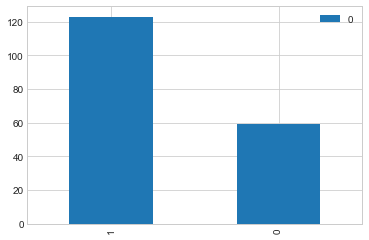

In [ ]:
# For Classification
# gen.pcc(df_data['survived'])
gen.pcc(df_transformed['survived'])

## Scaling

In [ ]:
mms = MinMaxScaler()
stdsc = StandardScaler()

# Supervised Learning

In [ ]:
target_column='survived'
# target_column='y'
df_targetR = df_transformed[target_column]
# df_dataR = df_dataX.drop(target_column,axis=1)
df_dataR = df_dum

In [ ]:
X = df_dataR
y = pd.DataFrame(df_targetR)

### Pairplot

In [ ]:
# pd.plotting.scatter_matrix(df_dataR, c=df_targetR, figsize=(15, 15), marker='o',
#                            hist_kwds={'bins': 20}, s=60, alpha=.8,cmap='viridis');

In [ ]:
# import seaborn as sns
# sns.set(style="darkgrid") #whitegrid, ticks  #df = sns.load_dataset("iris")
# sns.pairplot(df_dum, hue=target_column);

### Heatmap

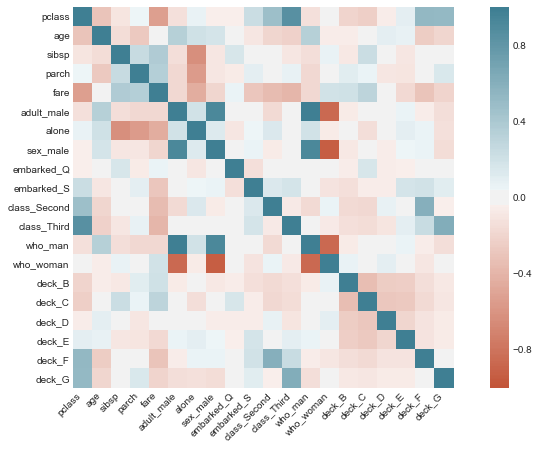

In [ ]:
gen.heatmap(X)

### Sensitivity

Num Feature  Accuracy
1        0.736248
2        0.763661
3        0.736339
4        0.725137
5        0.703097
6        0.725228
7        0.719763
8        0.725228
9        0.736248
10        0.741712
11        0.736248
12        0.736248
13        0.725228
14        0.725228
15        0.736248
16        0.741712
17        0.730692
18        0.725228
19        0.736248
20        0.736248


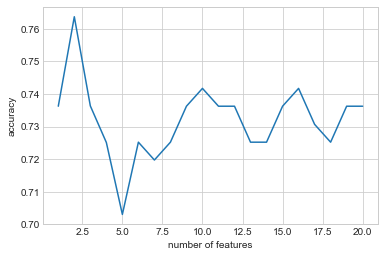

In [ ]:
gen.sensi_feat(X,y.values.ravel())
# gen.sensi_feat(X,y)

In [ ]:
top=2

In [ ]:
# gen.sensi(X,y).sort_values('Accuracy',ascending=False)
gen.sensi(X,y.values.ravel()).sort_values('Accuracy',ascending=False)

,Accuracy,Feature
7,0.741530,sex_male
13,0.730510,who_woman
5,0.692532,adult_male
12,0.692532,who_man
2,0.675865,sibsp
3,0.675865,parch
17,0.675865,deck_E
9,0.675865,embarked_S
1,0.664572,age
4,0.615574,fare


In [ ]:
# summary_knn=gen.sensi(X,y).sort_values('Accuracy',ascending=False).head(top)['Feature']
summary_knn=gen.sensi(X,y.values.ravel()).sort_values('Accuracy',ascending=False).head(top)['Feature']

In [ ]:
cls_wt=list(summary_knn)
cls_wt

['sex_male', 'who_woman']

In [ ]:
gen.OoOKNN(X,y)

knn, n neighbors=range(1, 30)



pclass
knn, n neighbors=range(1, 30)



age
knn, n neighbors=range(1, 30)



sibsp
knn, n neighbors=range(1, 30)



parch
knn, n neighbors=range(1, 30)



fare
knn, n neighbors=range(1, 30)



adult_male
knn, n neighbors=range(1, 30)



alone
knn, n neighbors=range(1, 30)



sex_male
knn, n neighbors=range(1, 30)



embarked_Q
knn, n neighbors=range(1, 30)



embarked_S
knn, n neighbors=range(1, 30)



class_Second
knn, n neighbors=range(1, 30)



class_Third
knn, n neighbors=range(1, 30)



who_man
knn, n neighbors=range(1, 30)



who_woman
knn, n neighbors=range(1, 30)



deck_B
knn, n neighbors=range(1, 30)



deck_C
knn, n neighbors=range(1, 30)



deck_D
knn, n neighbors=range(1, 30)



deck_E
knn, n neighbors=range(1, 30)



deck_F
knn, n neighbors=range(1, 30)



deck_G
knn, n neighbors=range(1, 30)


,accuracy,column
0,86.96%,age
1,82.61%,sibsp
2,80.43%,pclass
3,80.43%,deck_F
4,80.43%,deck_E
5,80.43%,deck_D
6,80.43%,deck_C
7,80.43%,deck_B
8,80.43%,class_Third
9,80.43%,class_Second


### Lasso Regularization

In [ ]:
summary_lasso=gen.LassoFS(X,y)
summary_lasso

lasso


,acc,alpha,top
3,0.273764,1.000000e-02,"[adult_male, who_woman, deck_C, parch, fare, d..."
2,0.223947,1.000000e-03,"[adult_male, deck_G, deck_C, who_woman, sex_ma..."
1,0.208373,1.000000e-04,"[adult_male, deck_G, who_woman, deck_C, sex_ma..."
0,0.206133,1.000000e-08,"[adult_male, deck_G, who_woman, deck_C, sex_ma..."
4,0.084326,1.000000e-01,"[who_woman, adult_male, age, fare, who_man, de..."
6,0.009632,4.000000e-01,"[age, deck_G, deck_F, sibsp, parch, fare, adul..."
5,0.009047,2.000000e-01,"[age, deck_G, deck_F, sibsp, parch, fare, adul..."
7,0.006195,7.500000e-01,"[age, deck_G, deck_F, sibsp, parch, fare, adul..."
8,0.000264,1.000000e+00,"[age, deck_G, deck_F, sibsp, parch, fare, adul..."
9,-0.017659,1.500000e+00,"[age, deck_G, deck_F, sibsp, parch, fare, adul..."


In [ ]:
cls_wt=summary_lasso['top'][7][:2]
cls_wt

['age', 'deck_G']

In [ ]:
# cls_wt = list(X.columns)

In [ ]:
# cls_wt = ['season','yr','weathersit','temp','atemp']

## Classification

### Classification Modelling

In [ ]:
from judas.classification.automate import Judas as JudasClassifier

trials = 20
judasc = JudasClassifier()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30)},
    {'model': 'logistic', 'reg': 'l1', 'trials': trials},
    {'model': 'logistic', 'reg': 'l2', 'trials': trials},
    {'model': 'svm', 'reg': 'l1', 'trials': trials},
    {'model': 'svm', 'reg': 'l2', 'trials': trials},
    {'model': 'nsvm-rbf', 'trials': trials},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20)},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20)},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10)},
]

judasc.automate(X,y,params)

knn, n neighbors=range(1, 30)



logistic, reg=l1



logistic, reg=l2



svm, reg=l1



svm, reg=l2



nsvm-rbf



ensemble-decisiontree, max depth=range(1, 20)



ensemble-randomforest, n estimators=range(1, 20)



ensemble-gbm, max depth=range(1, 10)


In [ ]:
judasc.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,74.89%,N_Neighbor = 1,NA
1,Logistic (l1),75.65%,C = 0.2,who_woman
2,Logistic (l2),74.67%,C = 0.1,who_woman
3,Linear SVM (l1),75.43%,C = 0.1,who_woman
4,Linear SVM (l2),74.57%,C = 0.1,who_woman
5,Nonlinear SVM (RBF),75.43%,gamma = 0.2,NA
6,Decision Trees,79.02%,depth = 1,adult_male
7,Random Forest,76.09%,n-estimator = 10,age
8,Gradient Boosting Method,75.87%,depth = 5,fare


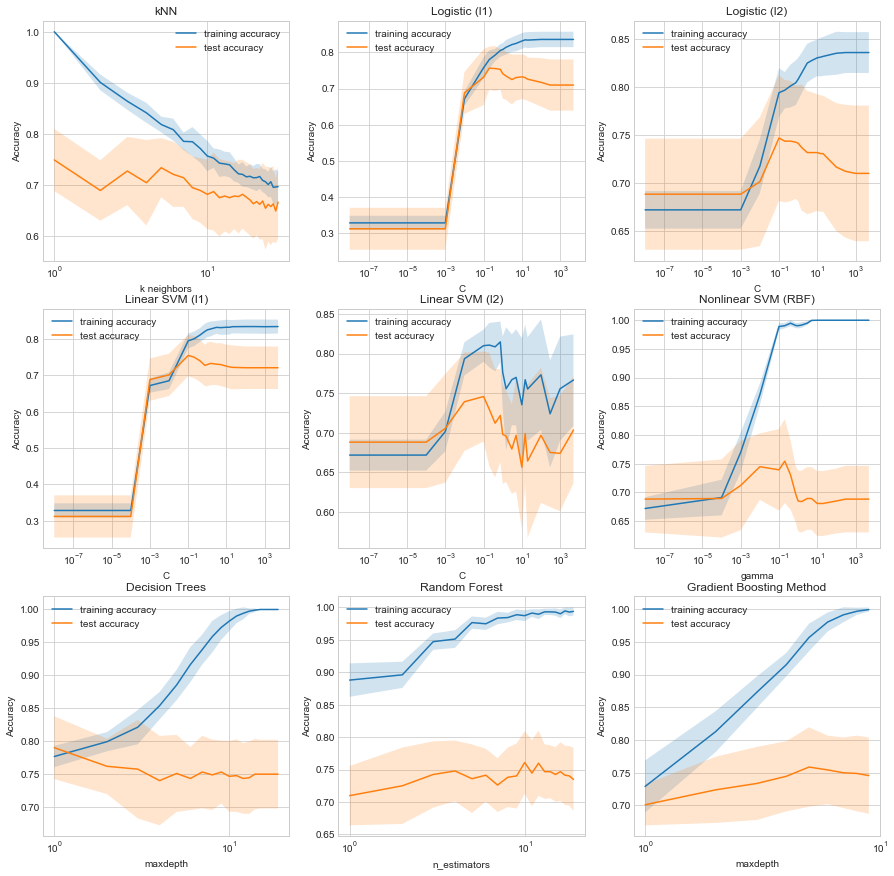

In [ ]:
judasc.plot_accuracy()

### Classification Modelling - Scaled

In [ ]:
from judas.classification.automate import Judas as JudasClassifier

trials = 20
judasc_mms = JudasClassifier()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30), 'scaler': mms},
    {'model': 'logistic', 'reg': 'l1', 'trials': trials, 'scaler': mms},
    {'model': 'logistic', 'reg': 'l2', 'trials': trials, 'scaler': mms},
    {'model': 'svm', 'reg': 'l1', 'trials': trials, 'scaler': mms},
    {'model': 'svm', 'reg': 'l2', 'trials': trials, 'scaler': mms},
    {'model': 'nsvm-rbf', 'trials': trials, 'scaler': mms},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20), 'scaler': mms},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20), 'scaler': mms},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10), 'scaler': mms},
]

judasc_mms.automate(X, y, params)

knn, n neighbors=range(1, 30)



logistic, reg=l1



logistic, reg=l2



svm, reg=l1



svm, reg=l2



nsvm-rbf



ensemble-decisiontree, max depth=range(1, 20)



ensemble-randomforest, n estimators=range(1, 20)



ensemble-gbm, max depth=range(1, 10)


In [ ]:
judasc_mms.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,76.52%,N_Neighbor = 24,NA
1,Logistic (l1),74.89%,C = 0.4,who_woman
2,Logistic (l2),74.78%,C = 0.4,who_woman
3,Linear SVM (l1),75.76%,C = 0.2,fare
4,Linear SVM (l2),75.00%,C = 0.1,fare
5,Nonlinear SVM (RBF),77.17%,gamma = 0.01,NA
6,Decision Trees,79.02%,depth = 1,adult_male
7,Random Forest,75.87%,n-estimator = 12,age
8,Gradient Boosting Method,75.65%,depth = 5,fare


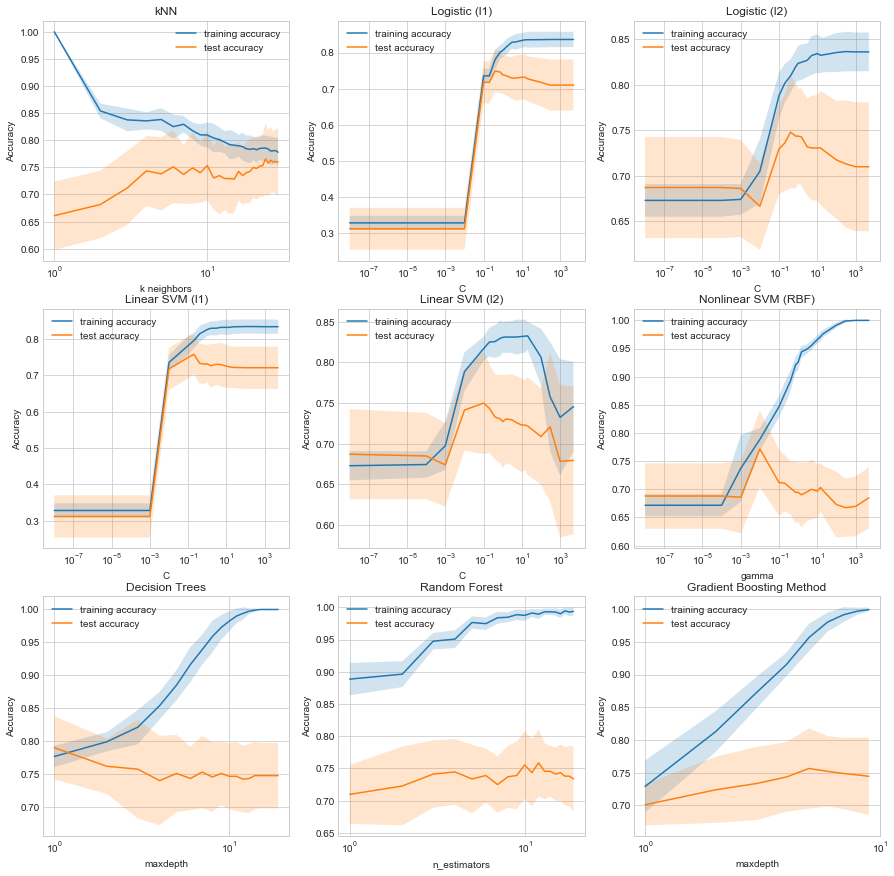

In [ ]:
judasc_mms.plot_accuracy()

In [ ]:
from judas.classification.automate import Judas as JudasClassifier

trials = 20
judasc_std = JudasClassifier()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30), 'scaler': stdsc},
    {'model': 'logistic', 'reg': 'l1', 'trials': trials, 'scaler': stdsc},
    {'model': 'logistic', 'reg': 'l2', 'trials': trials, 'scaler': stdsc},
    {'model': 'svm', 'reg': 'l1', 'trials': trials, 'scaler': stdsc},
    {'model': 'svm', 'reg': 'l2', 'trials': trials, 'scaler': stdsc},
    {'model': 'nsvm-rbf', 'trials': trials, 'scaler': stdsc},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20), 'scaler': stdsc},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20), 'scaler': stdsc},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10), 'scaler': stdsc},
]

judasc_std.automate(X, y, params)

knn, n neighbors=range(1, 30)



logistic, reg=l1



logistic, reg=l2



svm, reg=l1



svm, reg=l2



nsvm-rbf



ensemble-decisiontree, max depth=range(1, 20)



ensemble-randomforest, n estimators=range(1, 20)



ensemble-gbm, max depth=range(1, 10)


In [ ]:
cls_summary = judasc_std.score()
cls_summary

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,74.89%,N_Neighbor = 6,NA
1,Logistic (l1),77.39%,C = 0.1,who_man
2,Logistic (l2),77.50%,C = 0.001,adult_male
3,Linear SVM (l1),77.83%,C = 0.01,who_man
4,Linear SVM (l2),77.61%,C = 0.001,adult_male
5,Nonlinear SVM (RBF),76.20%,gamma = 0.001,NA
6,Decision Trees,79.02%,depth = 1,adult_male
7,Random Forest,75.87%,n-estimator = 12,age
8,Gradient Boosting Method,75.54%,depth = 5,fare


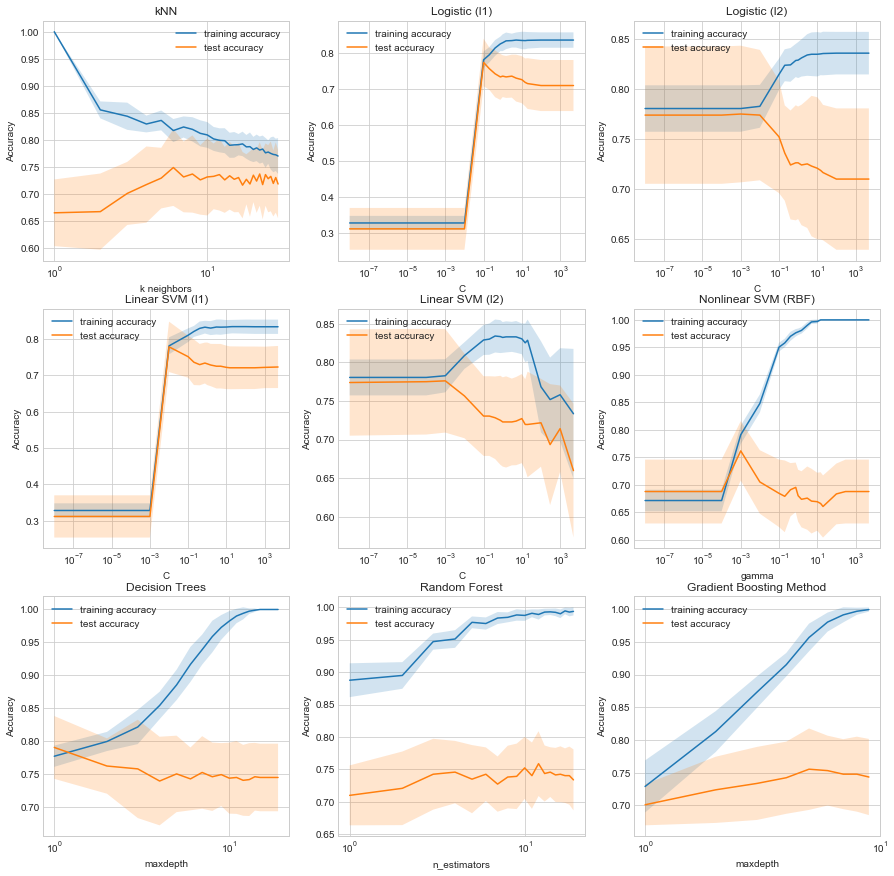

In [ ]:
judasc_std.plot_accuracy()

## Regression

Different Dataset

### Different Dataset

In [ ]:
X1 = np.arange(100)
X2 = np.random.uniform(0,100,100)
X = [X1, X2]
y = X1 + X2
# y = pd.Series(y,name='Target')

X = np.concatenate([X, [np.zeros(100)]*4], axis=0).T
X = pd.DataFrame(X, columns=['col{}'.format(i) for i in range(X.shape[1])])
X.head()

,col0,col1,col2,col3,col4,col5
0,0.0,91.457324,0.0,0.0,0.0,0.0
1,1.0,75.239808,0.0,0.0,0.0,0.0
2,2.0,66.653150,0.0,0.0,0.0,0.0
3,3.0,86.721869,0.0,0.0,0.0,0.0
4,4.0,20.631380,0.0,0.0,0.0,0.0


### Regression Modelling

In [ ]:
from judas.regression.automate import Judas as JudasRegressor

trials = 5
judasr = JudasRegressor()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30)},
    {'model': 'linear', 'trials': trials},
    {'model': 'lasso', 'trials': trials},
    {'model': 'ridge', 'trials': trials},
#     {'model': 'svm', 'trials': trials},
    {'model': 'svm-rbf', 'trials': trials},
#     {'model': 'svm-poly', 'trials': trials},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20)},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20)},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10)},
]
judasr.automate(X,y,params)

knn, n neighbors=range(1, 30)



linear



lasso



ridge



svm-rbf



ensemble-decisiontree, max depth=range(1, 20)



[0.19267853 0.5554475  0.78809159 0.83678788 0.89771347 0.89259723
 0.91643069 0.9197742  0.91399841 0.90907314 0.90907314 0.90907314
 0.90907314 0.90907314 0.90907314 0.90907314 0.90907314 0.90907314
 0.90907314]
ensemble-randomforest, n estimators=range(1, 20)



ensemble-gbm, max depth=range(1, 10)


In [ ]:
judasr.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,97.82%,N_Neighbor = 3,NA
1,Linear,100.00%,NA,col0
2,Lasso,100.00%,alpha = 1e-08,col0
3,Ridge,100.00%,alpha = 1e-08,col0
4,SVR (rbf),8.56%,C = 100,NA
5,Decision Trees,91.98%,depth = 8,col0
6,Random Forest,95.87%,n-estimator = 18,col0
7,Gradient Boosting Method,76.98%,depth = 5,col0


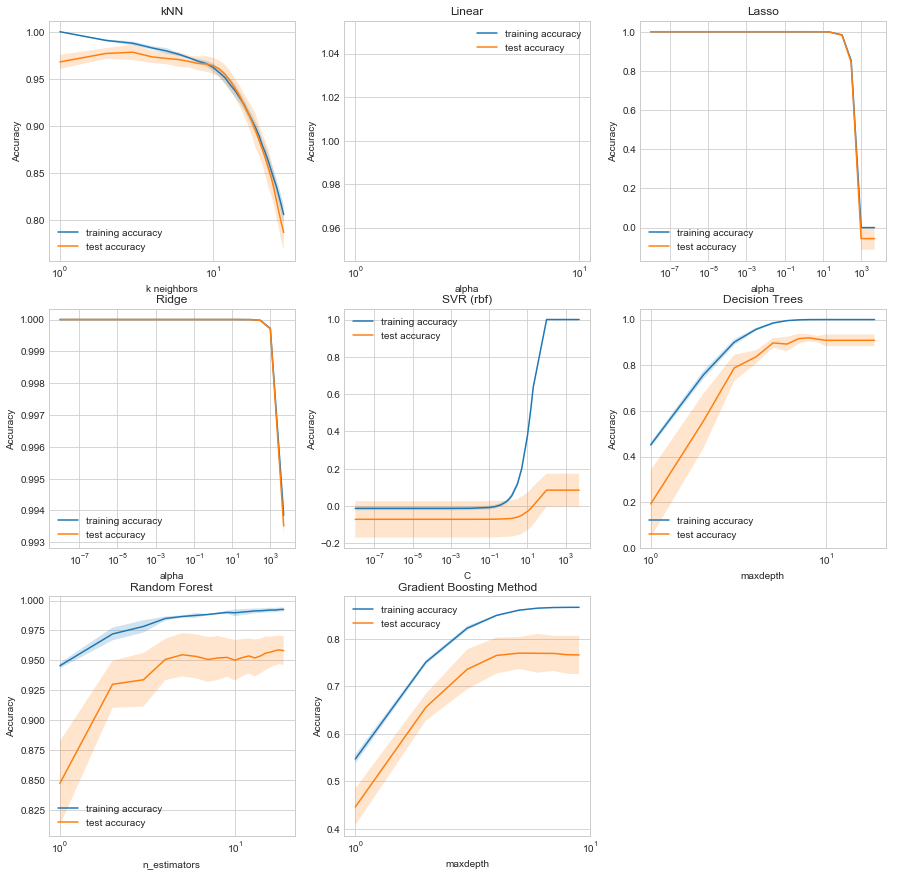

In [ ]:
judasr.plot_accuracy()

### Regression Modelling - Scaled

In [ ]:
from judas.regression.automate import Judas as JudasRegressor

trials = 5
judasr_mms = JudasRegressor()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30), 'scaler': mms},
    {'model': 'linear', 'trials': trials, 'scaler': mms},
    {'model': 'lasso', 'trials': trials, 'scaler': mms},
    {'model': 'ridge', 'trials': trials, 'scaler': mms},
    {'model': 'svm', 'trials': trials, 'scaler': mms},
    {'model': 'svm-rbf', 'trials': trials, 'scaler': mms},
#     {'model': 'svm-poly', 'trials': trials, 'scaler': mms},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20), 'scaler': mms},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20), 'scaler': mms},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10), 'scaler': mms},
]
judasr_mms.automate(X,y,params)

knn, n neighbors=range(1, 30)



linear



lasso



ridge



svm



svm-rbf



svm-poly


In [ ]:
judasr_mms.score()

In [ ]:
judasr_mms.plot_accuracy()

In [ ]:
from judas.regression.automate import Judas as JudasRegressor

trials = 5
judasr_std = JudasRegressor()
params = [
    {'model': 'knn', 'trials': trials, 'k': range(1, 30), 'scaler': stdsc},
    {'model': 'linear', 'trials': trials, 'scaler': stdsc},
    {'model': 'lasso', 'trials': trials, 'scaler': stdsc},
    {'model': 'ridge', 'trials': trials, 'scaler': stdsc},
    {'model': 'svm', 'trials': trials, 'scaler': stdsc},
    {'model': 'svm-rbf', 'trials': trials, 'scaler': stdsc},
#     {'model': 'svm-poly', 'trials': trials, 'scaler': stdsc},
    {'model': 'ensemble-decisiontree', 'trials': trials, 'maxdepth': range(1, 20), 'scaler': stdsc},
    {'model': 'ensemble-randomforest', 'trials': trials, 'n_est': range(1, 20), 'scaler': stdsc},
    {'model': 'ensemble-gbm', 'trials': trials, 'maxdepth': range(1, 10), 'scaler': stdsc},
]
judasr_std.automate(X,y,params)

In [ ]:
judasr_std.score()

In [ ]:
judasr_std.plot_accuracy()

# Predict

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
Xp = np.array(X_test.iloc[0,:])
print(Xp)

[89.     83.     85.     80.     76.     76.     86.     87.     78.
  1.4104  1.6364  1.7008  2.     75.     55.      1.      5.    ]


## Classifier

### KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
par=int(cls_summary.loc[0]['Best Parameter'].split(" = ")[1])
clf = KNeighborsClassifier(n_neighbors=par)
clf.fit(X_train, y_train)
pr = clf.predict(Xp.reshape(1, -1))
pr

array([1], dtype=int64)

### Logistic Regression L1

In [53]:
from sklearn.linear_model import LogisticRegression
par=float(cls_summary.loc[1]['Best Parameter'].split(" = ")[1])
lreg1 = LogisticRegression(solver='liblinear', penalty='l1', multi_class='auto', C=par)
lreg1.fit(X_train, y_train)
pr = lreg1.predict(Xp.reshape(1, -1))
pr

array([1], dtype=int64)

### Logistic Regression L2

In [54]:
from sklearn.linear_model import LogisticRegression
par=float(cls_summary.loc[2]['Best Parameter'].split(" = ")[1])
lreg2 = LogisticRegression(solver='liblinear', penalty='l2', multi_class='auto', C=par)
lreg2.fit(X_train, y_train)
pr = lreg2.predict(Xp.reshape(1, -1))
pr

array([1], dtype=int64)

### Linear SVM L1

In [55]:
from sklearn.svm import LinearSVC
par=float(cls_summary.loc[3]['Best Parameter'].split(" = ")[1])
lsvc1 = LinearSVC(loss='squared_hinge', dual=False, penalty='l1',C=par)
lsvc1.fit(X_train, y_train)
pr = lsvc1.predict(Xp.reshape(1, -1))
pr

array([1], dtype=int64)

### Linear SVM L2

In [56]:
from sklearn.svm import LinearSVC
par=float(cls_summary.loc[4]['Best Parameter'].split(" = ")[1])
lsvc2 = LinearSVC(loss='squared_hinge', dual=False, penalty='l2',C=par)
lsvc2.fit(X_train, y_train)
pr = lsvc2.predict(Xp.reshape(1, -1))
pr

array([1], dtype=int64)

## Regression

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
par=int(reg_summary.loc[0]['Best Parameter'].split(" = ")[1])
reg = KNeighborsRegressor(n_neighbors=21)
reg.fit(X_train, y_train)
pr = reg.predict(Xp.reshape(1, -1))
pr

### Lasso Regressor

In [ ]:
from sklearn.linear_model import Lasso
par=float(reg_summary.loc[1]['Best Parameter'].split(" = ")[1])
lasso = Lasso(alpha=par)
lasso.fit(X_train, y_train)
pr = lasso.predict(Xp.reshape(1, -1))
pr

### Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
par=float(reg_summary.loc[2]['Best Parameter'].split(" = ")[1])
ridge = Ridge(alpha=par)
ridge.fit(X_train, y_train)
pr = ridge.predict(Xp.reshape(1, -1))
pr

**With Library provided by**: Christopher Monterola and Jude Teves -  JUDAS, updated by Radney Racela 